Этот датасет представляет собой результат прямых маркетинговых кампаний португальского банка. Маркетинговые кампании были основаны на телефонных звонках. Часто требовалось более одного контакта с одним и тем же клиентом,
чтобы узнать, будет либанковский срочный депозит подписан (или нет).
**Задача классификации**: предсказать, подпищет ли клиент банковский срочный депозит или нет (переменная у)

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=7ccbb8927f3090eae153a68288740495bd113d3e77cb4e88f931edd1c1881735
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:
import os
from pandas import read_csv
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats

In [ ]:
import pingouin as pg
import pandas as pd
from numpy import array
from numpy.random import seed
from numpy.random import rand
from numpy.random import randn
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower
from statsmodels.stats.power import FTestAnovaPower
from statsmodels.stats.weightstats import ztest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**1. Первичный анализ данных**

In [ ]:
os.chdir('/content/drive/MyDrive/data') # подключаем диск и считываем данные

In [ ]:
data = read_csv('bank-full.csv', sep = ';') # загружаем датасет в датафрейм и выводим первые 5 строк на экран
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.shape # выводим размер датасета

(45211, 17)

In [ ]:
data.dtypes # определяем тип данных

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
data.info() # выводим общую информацию по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.groupby('y').size() # сгруппируем данные по целевой переменной "у" и посмотрим, сколько человек подпишет депозит, а сколько нет

y
no     39922
yes     5289
dtype: int64

Датасет не сбалансированный

In [ ]:
data.describe() # Выведим на экран описательные статистики

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.skew() # рассчитаем показатель асимметрии для всех признаков

<ipython-input-13-1e3cf8700863>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew() # рассчитаем показатель асимметрии для всех признаков


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

Асимметрия есть у всех признаков. Значение должно стремиться к нулю.



In [ ]:
data.kurtosis()  # рассчитаем показатель эксцесса для всех признаков

<ipython-input-14-a85e5501c266>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()  # рассчитаем показатель эксцесса для всех признаков


age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

In [ ]:
data.corr(method='pearson') # рассчитаем коэффициент корреляции Пирсона

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Чем ближе по модулю к 1 (>0.8) тем сильнее связь. Здесь таких нет. Связи слабые

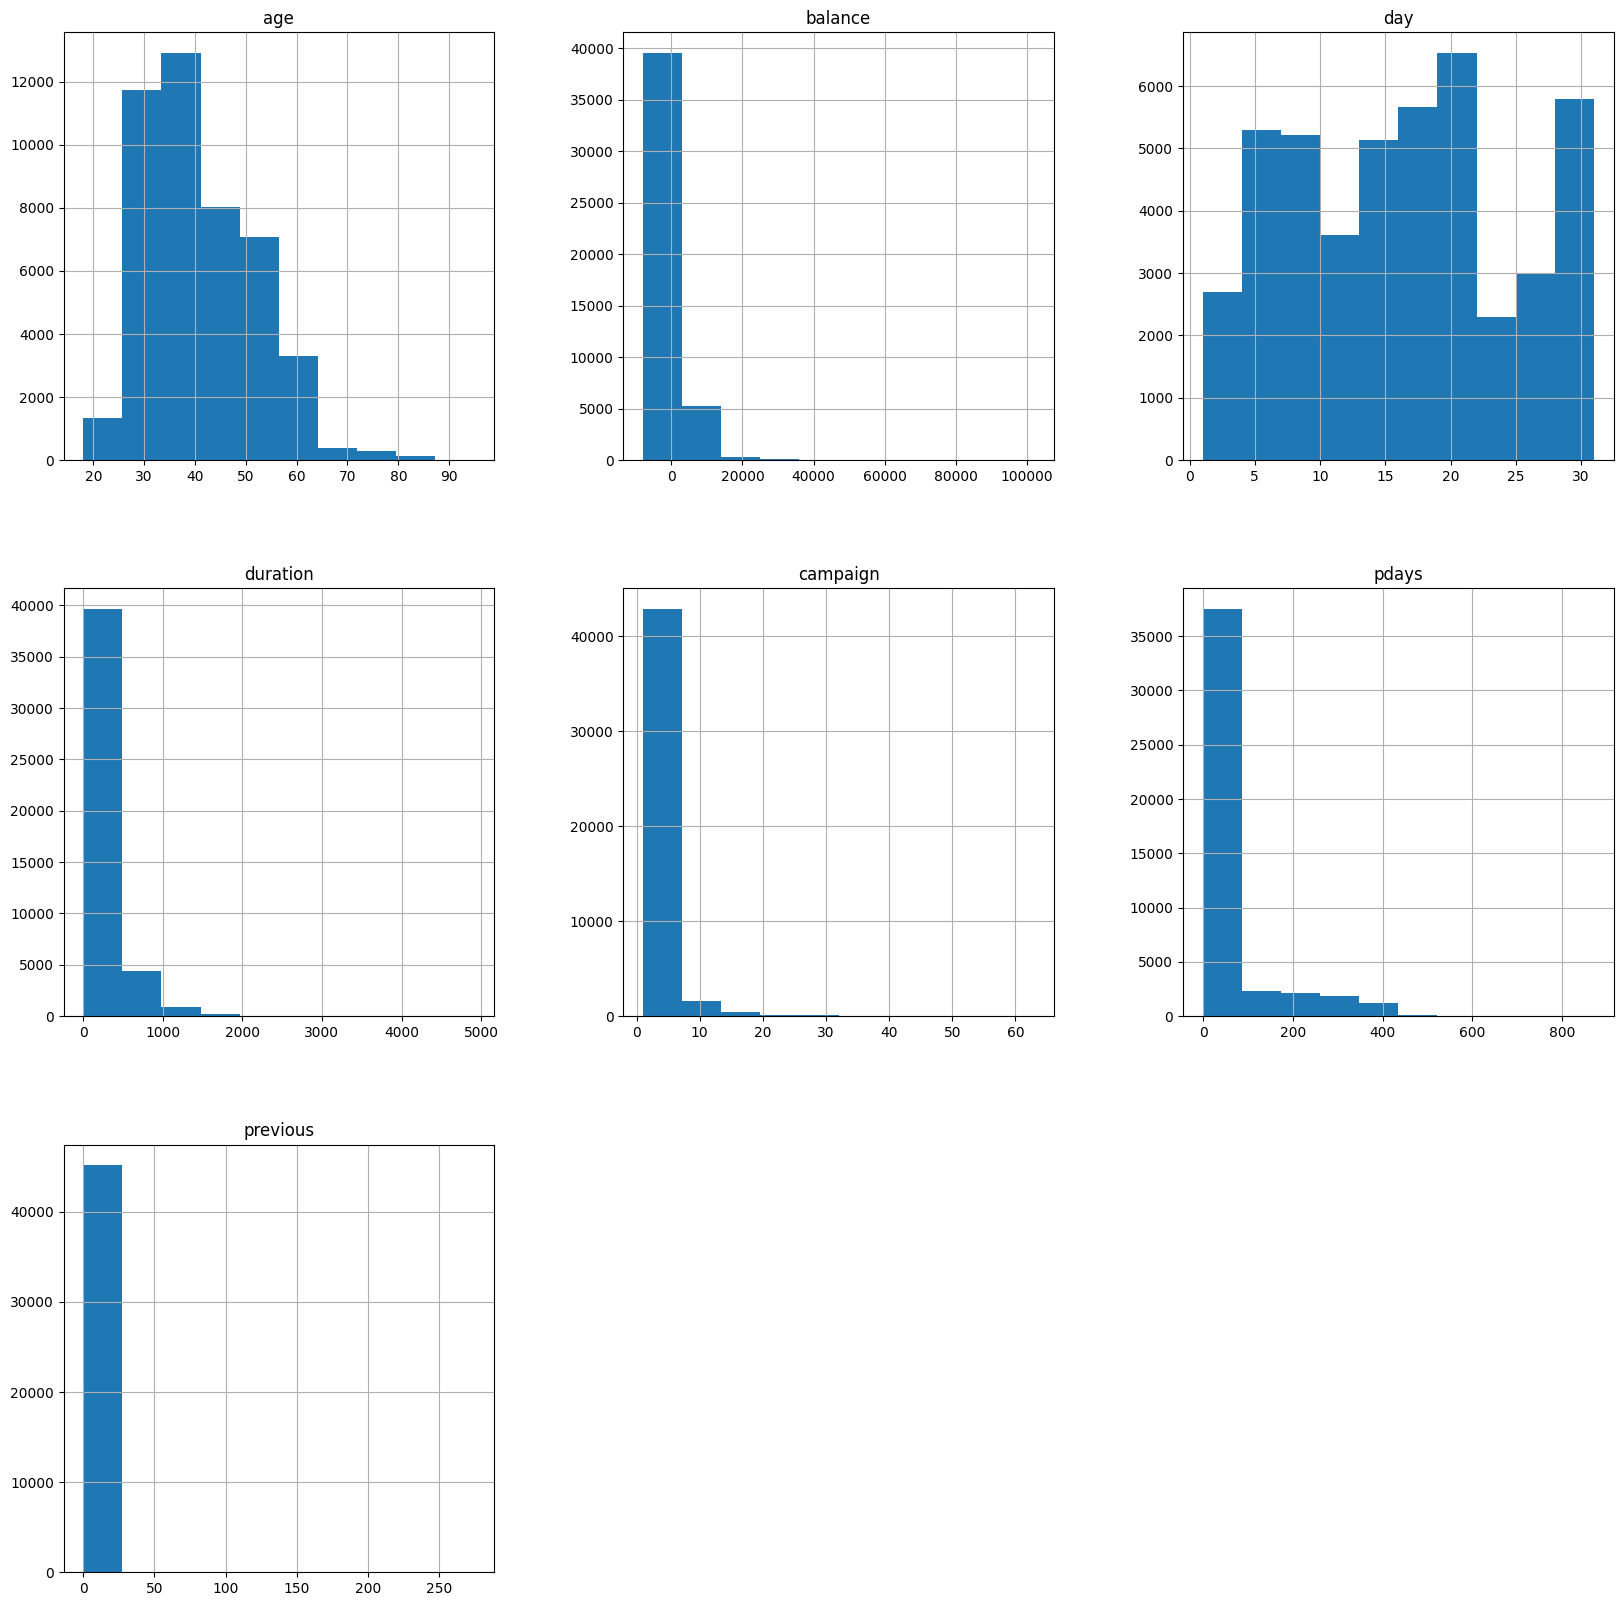

In [ ]:
data.hist(figsize=(20,20)) # построим гистограмму для всех признаков
plt.show()

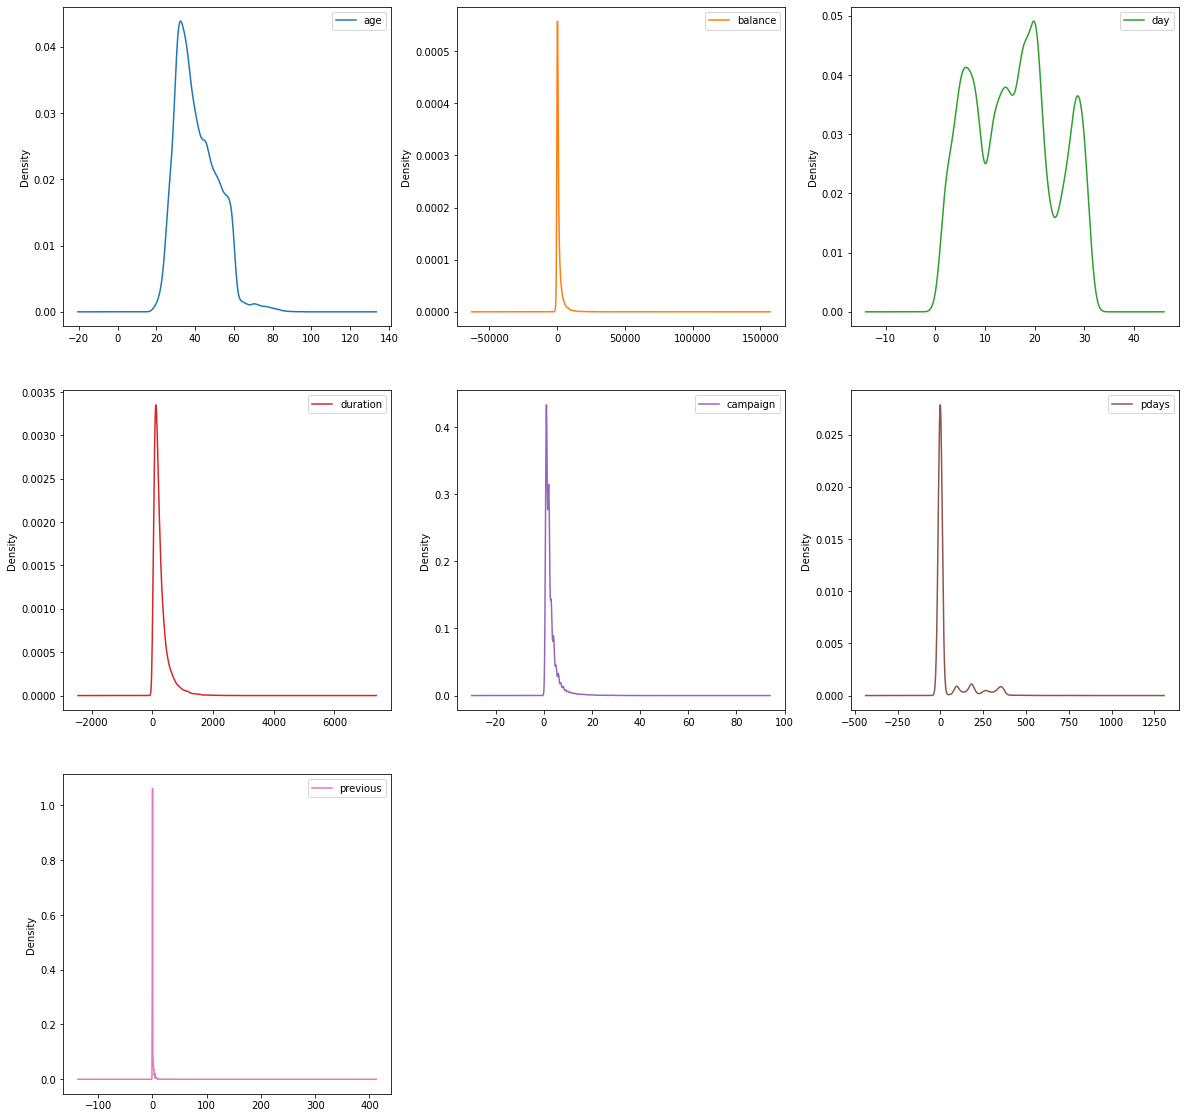

In [ ]:
data.plot(kind='kde', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,20))
plt.show()  # построим ядерную функцию плотности для всех признаков

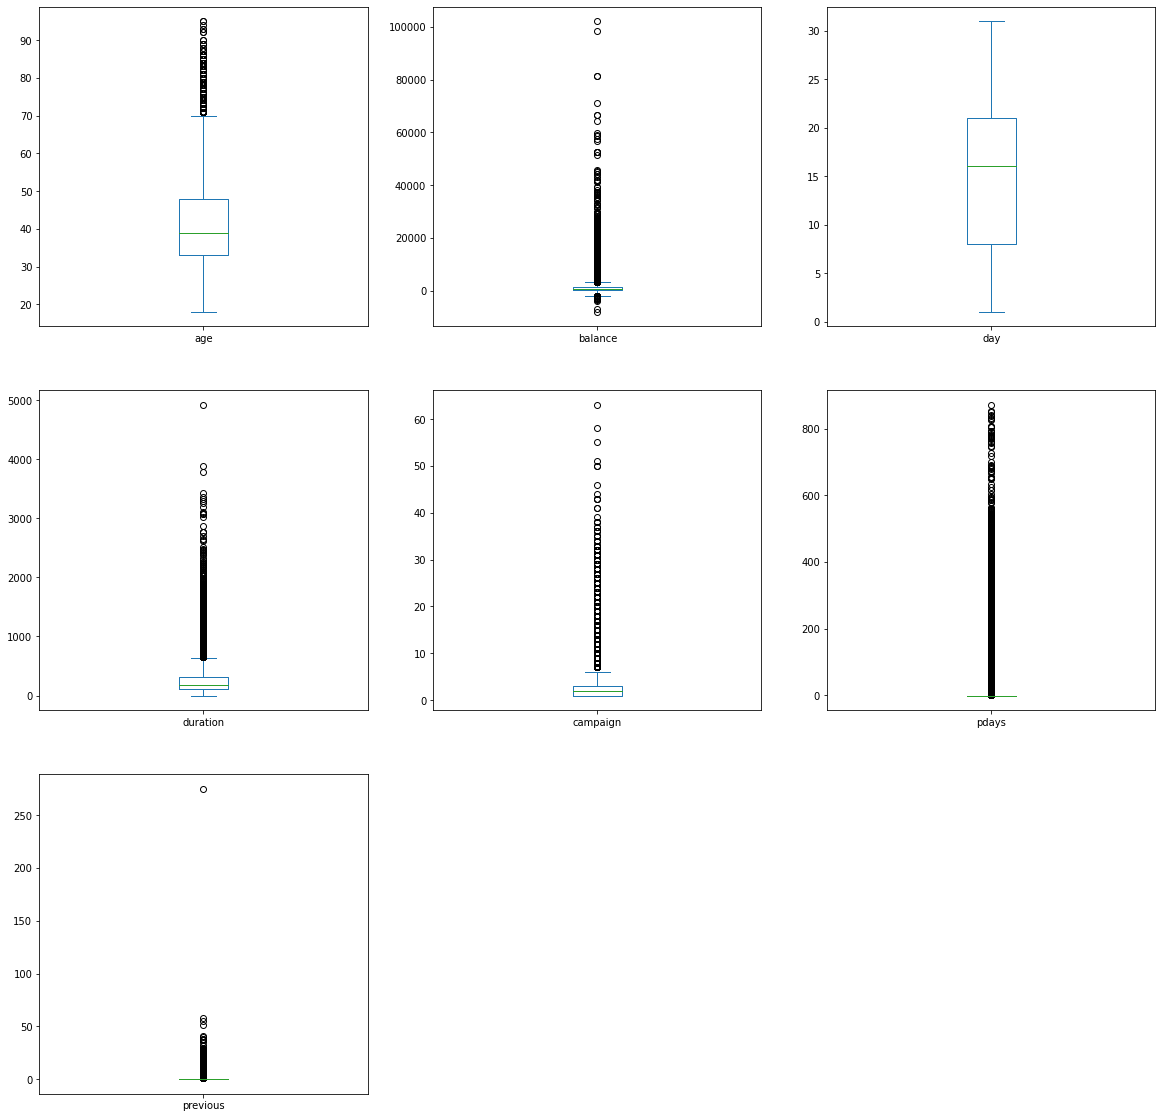

In [ ]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,20))
plt.show() # построим ящики с усами для всех признаков

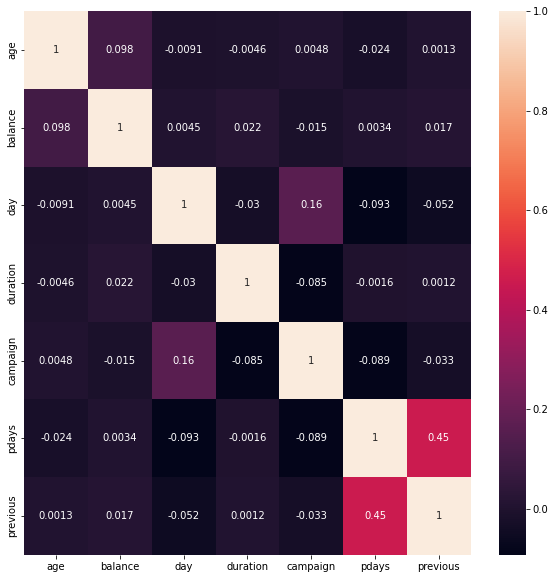

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True) 
plt.show()

Тепловая карта подтверждает слабую связь между признакаими

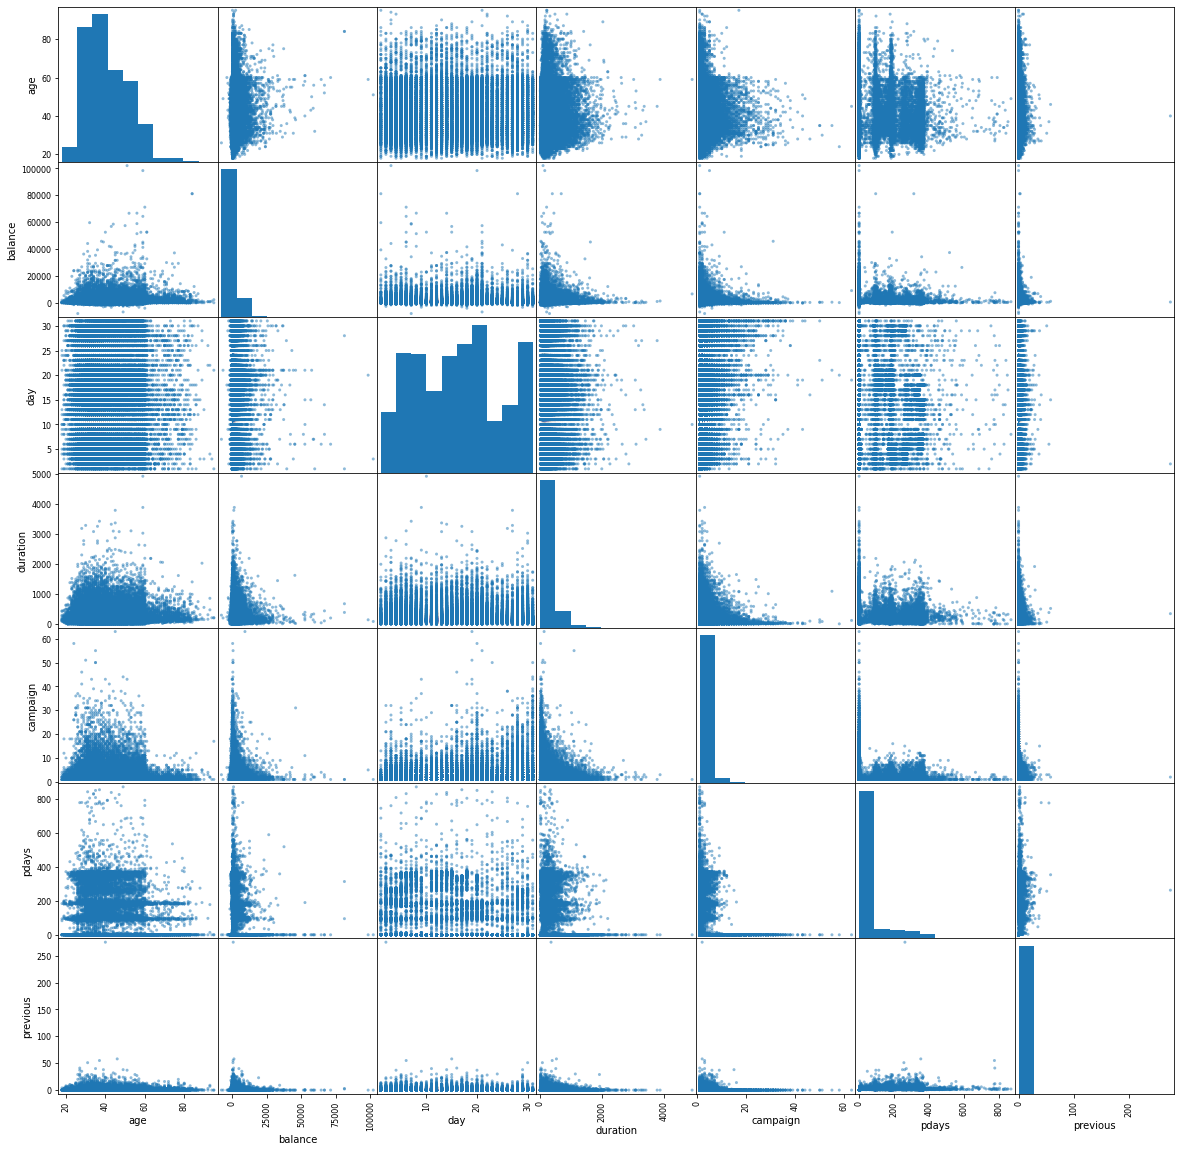

In [ ]:
scatter_matrix(data, figsize=(20,20))
plt.show()

In [ ]:
pg.normality(data) 

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
age,0.960546,0.0,False
balance,0.457170,0.0,False
day,0.959460,0.0,False
duration,0.726995,0.0,False
campaign,0.550732,0.0,False
pdays,0.474787,0.0,False
previous,0.235591,0.0,False


**Вывод:** Датасет не сбалансированный, распределение не нормальное, данные асимметричны и отсутствуют сильные связи между признаками

In [ ]:
# Для начала приведем все данные к одному формату
data[['job','marital','education','default', 'housing','loan', 'contact', 'month', 'poutcome', 'y']] = data[['job', 'marital','education','default', 'housing','loan', 'contact', 'month', 'poutcome', 'y']].astype('category')

In [ ]:
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
array = data.values

In [ ]:
X = array[:,0:16]

In [ ]:
y = array[:,16]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state= 7)

In [ ]:
models = []

In [ ]:
models.append(('lr',LogisticRegression(solver='liblinear')))
models.append(('knn',KNeighborsClassifier()))
models.append(('lda',LinearDiscriminantAnalysis()))
models.append(('cart',DecisionTreeClassifier()))
models.append(('nb',GaussianNB()))

In [ ]:
results = []
names = []

In [ ]:
scoring = 'roc_auc'

In [ ]:
for name, model in models:
  kfold = KFold(n_splits= 10, random_state = 7, shuffle=True)
  cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name) 

In [ ]:
for (name, result) in zip (names,results):
  print(name, result.mean(), result.std())


lr 0.8707698464762839 0.005656331790234127
knn 0.764660644073978 0.005871845411824225
lda 0.8723667477877965 0.005258439767998463
cart 0.7024050178396819 0.006439505265389869
nb 0.8177138712744298 0.007376068052885799


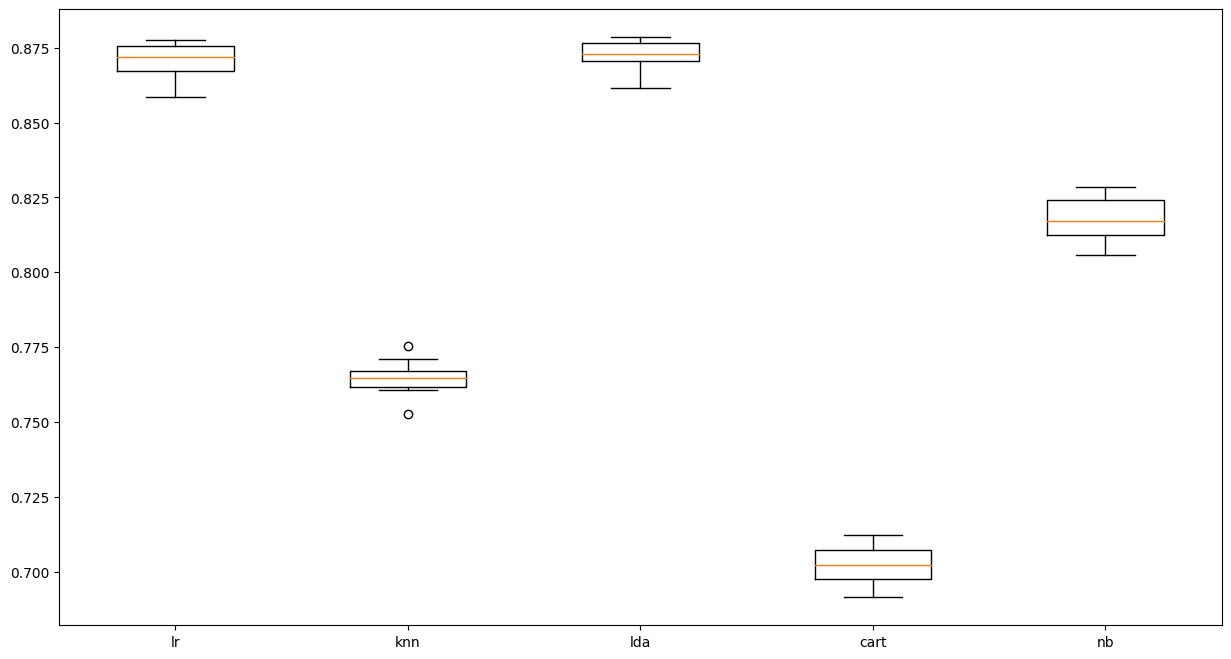

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Лучшее качество показали линейный дискриминантный анализ и логистическая регрессия

In [ ]:
model_lda = LinearDiscriminantAnalysis().fit(X_train,Y_train)
model_lda

LinearDiscriminantAnalysis()

In [ ]:
predictions_lda = model_lda.predict(X_test)

In [ ]:
accuracy_score(Y_test,predictions_lda) 

0.899037929890523

In [ ]:
precision_score (Y_test,predictions_lda)

0.5941499085923218

In [ ]:
roc_auc_score(Y_test,predictions_lda) 

0.6461126154935753

In [ ]:
matrix = confusion_matrix(Y_test,predictions_lda)
print(matrix)

[[7805  222]
 [ 691  325]]


In [ ]:
report = classification_report(Y_test,predictions_lda)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8027
           1       0.59      0.32      0.42      1016

    accuracy                           0.90      9043
   macro avg       0.76      0.65      0.68      9043
weighted avg       0.88      0.90      0.89      9043



In [ ]:
def stacking(models, meta_alg, data_train, targets_train, data_test=None, targets_test=None, random_state=None, test_size=None, cv=5):
    if test_size is None:
      meta_mtrx = np.empty((data.shape[0], len(models)))
      for n, model in enumerate(models):
        meta_mtrx[:, n] = cross_val_predict(model, data_train, targets_train, cv=cv, method='predict')
        base_algotithm = model.fit(data_train, targets_train)
        predicted = model.predict(data_train)
      meta_model = meta_alg.fit(meta_mtrx, targets_train)
      meta_mtrx_test = np.empty((data.shape[0], len(models)))
      for n, model in enumerate(models):
        meta_mtrx_test[:, n] = model.predict(data_train)
          
      meta_predict = meta_alg.predict(meta_mtrx_test)
      if  y is not None:
        print(f'Stacking AUC: {roc_auc_score(targets_train, meta_predict)}')
        matrix = confusion_matrix(targets_train, meta_predict)
        print(f'Матрица ошибок:\n {matrix}')
        report = classification_report(targets_train, meta_predict)
        print(f'Отчет:\n {report}')
    
    elif test_size > 0 and test_size < 1:
        data_train, data_test, targets_train, targets_test  = train_test_split(X_train, 
                                                        Y_train,
                                                        test_size=test_size,
                                                        random_state=random_state)
        meta_mtrx = np.empty((data_test.shape[0], len(models)))
        for n, model in enumerate(models):
          base_algotithm = model.fit(data_train, targets_train)
          meta_mtrx[:, n] = model.predict(data_test)
          predicted = model.predict(data_train)
          

        meta_model = meta_alg.fit(meta_mtrx, targets_test)
        meta_mtrx_test = np.empty((data_test.shape[0], len(models))) 

        for n, model in enumerate(models):
          meta_mtrx_test[:, n] = model.predict(data_test)
    
        meta_predict = meta_alg.predict(meta_mtrx_test)

        if  targets_test is not None:
          print(f'Stacking AUC: {roc_auc_score(targets_test, meta_predict)}')
          matrix = confusion_matrix(targets_test, meta_predict)
          print(f'Матрица ошибок:\n  {matrix}')
          report = classification_report(targets_test, meta_predict)
          print(f'Отчет:\n {report}')

            
    else:
        raise ValueError("test_size must be between 0 and 1")

In [ ]:
rfc  = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()

In [ ]:
models = [rfc, gb, lr,lda] 
meta_alg = XGBClassifier(n_estimators=40)

блендинг

In [ ]:
stacking(models, meta_alg, X_train, X_test, Y_train, Y_test, test_size=0.25, random_state=17, cv = 5)

Stacking AUC: 0.7131217093034786
Матрица ошибок:
  [[7702  277]
 [ 573  490]]
Отчет:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7979
           1       0.64      0.46      0.54      1063

    accuracy                           0.91      9042
   macro avg       0.78      0.71      0.74      9042
weighted avg       0.90      0.91      0.90      9042



классический стекинг

In [ ]:
stacking(models, meta_alg, data, y, test_size=None, random_state=17)

Stacking AUC: 1.0
Матрица ошибок:
 [[39922     0]
 [    0  5289]]
Отчет:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39922
           1       1.00      1.00      1.00      5289

    accuracy                           1.00     45211
   macro avg       1.00      1.00      1.00     45211
weighted avg       1.00      1.00      1.00     45211

